## This notebook is used for modeling and prediction of the income per person for each sa2 (2016)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# load data
income = pd.read_csv('../data/curated/income_per_person_sa2.csv', index_col=[0])
income

,SA2,SA2 NAME,2012,2013,2014,2015,2016,2017,2018,2019
0,201011001,Alfredton,51670.073951,52993.212211,54624.783507,56373.600964,57746.696785,60026.081134,62315.127415,63668.274127
1,201011002,Ballarat,61177.132231,63669.220872,65506.668018,67216.710660,72754.453378,71895.145248,74671.366381,77875.693878
2,201011003,Ballarat - North,48946.980038,50871.715079,52023.790882,53016.994081,54660.327661,56067.366669,59786.487796,60366.697603
3,201011004,Ballarat - South,41918.131939,43625.173890,44721.796782,45473.451837,46143.213201,47676.111970,49041.036441,50778.316302
4,201011005,Buninyong,53538.216040,55674.656008,56765.499102,58010.968734,58292.425144,60008.747450,61564.815018,63257.766533
...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,39330.688626,36935.722554,39768.884651,40639.888539,42425.576401,44235.906695,44755.438398,46448.133475
458,217041477,Moyne - East,43776.493154,37883.223483,46721.779160,48626.519794,47031.049570,49103.852024,50652.260496,55572.647880
459,217041478,Moyne - West,43419.626551,42510.701418,46052.713707,48279.664071,50306.901464,51459.022573,52080.290026,55546.749316
460,217041479,Warrnambool - North,45988.991412,46933.500648,48440.255857,50513.442675,50938.952292,52089.753663,59811.605637,56098.576195


In [3]:
# get unique year and sa2 code values
year = list(income.columns)[2:]
sa2 = list(income['SA2'].unique())

In [4]:
# get dataframe for later modeling, year is numerical value
# https://stackoverflow.com/questions/28654047/convert-columns-into-rows-with-pandas
income = income.melt(id_vars=["SA2", "SA2 NAME"], var_name = "Year", value_name="Income_per_person").drop(columns="SA2 NAME")
income['Year'] = income['Year'].astype(int)
income

,SA2,Year,Income_per_person
0,201011001,2012,51670.073951
1,201011002,2012,61177.132231
2,201011003,2012,48946.980038
3,201011004,2012,41918.131939
4,201011005,2012,53538.216040
...,...,...,...
3643,217031476,2019,46448.133475
3644,217041477,2019,55572.647880
3645,217041478,2019,55546.749316
3646,217041479,2019,56098.576195


<AxesSubplot: xlabel='SA2', ylabel='Income_per_person'>

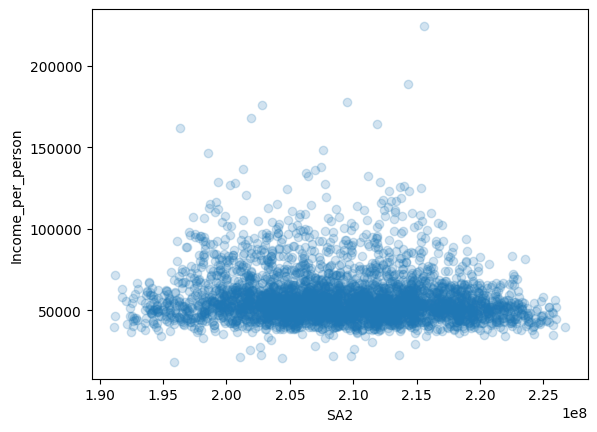

In [5]:
# plot to see the relationship between the sa2 and income per person and the year and income per person
# https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter
sns.regplot(data = income, x = 'SA2', y = 'Income_per_person', fit_reg = False, x_jitter = 10000000, y_jitter = 5, scatter_kws = {'alpha' : 1/5})

<AxesSubplot: xlabel='Year', ylabel='Income_per_person'>

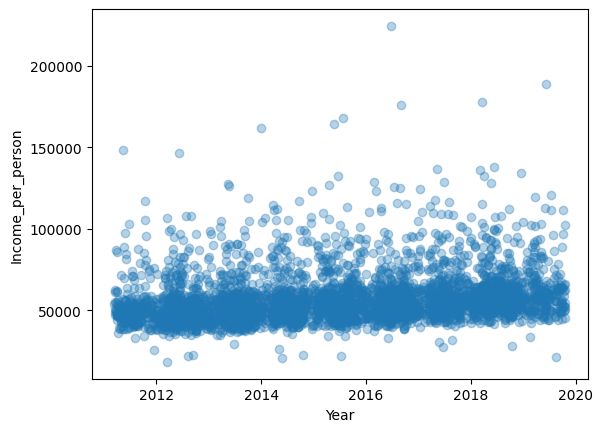

In [6]:
sns.regplot(data = income, x = 'Year', y = 'Income_per_person', fit_reg = False, x_jitter = 0.8, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

In [7]:
# get dataframe for later modeling, sa2 code(2016) is categorical value, get dummy values of sa2 code(2016)
incomeDummies = pd.get_dummies(income, columns=['SA2'])
incomeDummies

,Year,Income_per_person,SA2_201011001,SA2_201011002,SA2_201011003,SA2_201011004,SA2_201011005,SA2_201011006,SA2_201011007,SA2_201011008,...,SA2_217031471,SA2_217031472,SA2_217031473,SA2_217031474,SA2_217031475,SA2_217031476,SA2_217041477,SA2_217041478,SA2_217041479,SA2_217041480
0,2012,51670.073951,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,61177.132231,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,48946.980038,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,41918.131939,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,53538.216040,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,2019,46448.133475,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3644,2019,55572.647880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3645,2019,55546.749316,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3646,2019,56098.576195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# use linear regression for modeling, and use holdout method for training and testing
X = incomeDummies.loc[:, incomeDummies.columns != 'Income_per_person']
y = incomeDummies.loc[:, incomeDummies.columns == 'Income_per_person']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
lm = LinearRegression()
lm.fit(X_train, y_train.values.ravel())

LinearRegression()

In [9]:
# test the accuracy of the trainging linear regression
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(lm.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.97


In [10]:
# preprare year and sa2 code (2016) for later predicting values of 2020 - 2027
pred_sa2 = sa2
pred_year = list(range(2020,2028))
year_lst = []
pred_lst = []
for year in pred_year:
    for pred in pred_sa2:
        year_lst.append(year)
pred_sa2 = pred_sa2* len(pred_year)
data = {'Year':year_lst, 'sa2_2016':pred_sa2}
pred_income = pd.DataFrame(data = data)
pred_income

,Year,sa2_2016
0,2020,201011001
1,2020,201011002
2,2020,201011003
3,2020,201011004
4,2020,201011005
...,...,...
3643,2027,217031476
3644,2027,217041477
3645,2027,217041478
3646,2027,217041479


In [11]:
# make prediction of income per person for each sa2 (2016) of 2020 - 2027 using the trained model
pred_incomeDummies = pd.get_dummies(pred_income, columns=['sa2_2016'])
result = lm.predict(pred_incomeDummies)
pred_income['income_per_person_sa2'] = list(result)
pred_income

/Users/nuomi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sa2_2016_201011001
- sa2_2016_201011002
- sa2_2016_201011003
- sa2_2016_201011004
- sa2_2016_201011005
- ...
Feature names seen at fit time, yet now missing:
- SA2_201011001
- SA2_201011002
- SA2_201011003
- SA2_201011004
- SA2_201011005
- ...

  warnings.warn(message, FutureWarning)


,Year,sa2_2016,income_per_person_sa2
0,2020,201011001,64236.543698
1,2020,201011002,75818.170402
2,2020,201011003,61409.039602
3,2020,201011004,53359.669347
4,2020,201011005,64938.400987
...,...,...,...
3643,2027,217031476,59333.785210
3644,2027,217041477,64413.827316
3645,2027,217041478,66145.072180
3646,2027,217041479,68444.236360


In [12]:
# output csv file of predicted values of income per person for each sa2 (2016) of 2020 - 2027
pred_income.to_csv('../data/curated/feature_prediction/20_27_income_per_person_2016sa2.csv')

## Export Model for Web (Flask)

In [13]:
import pickle
pickle.dump(lm, open('../web/models/income_model.pkl','wb'))
model = pickle.load(open('../web/models/income_model.pkl','rb'))